# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy>Artificial Neural Networks</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

<img src='images/ai_ml.png' style='width: 70%'/>

<img src='images/supervised.png' style='width: 70%'/>



### Readings:

1. Chapter 11, [The Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf)
2. Chapter 20, [Understanding Machine Learning: From Theory to Algorithms](https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf) 
3. A Gentle Introduction to Neural Networks (with Python), by Tariq Rashid [YouTube Video](https://www.youtube.com/watch?v=SJWCcCeuRas&t=1738s)

### Translate between Econometrics (statistics) and Machine Learning

|Econometrics|Machine Learning|
|-----|-----|
|X: Explanatory Variables |X: Input Variables|
|y: Dependent Variable|y: Out put Variable|
|$\beta_0$: Intercept/Constant|b: Bias |
|$\beta$: Coeficients|$w$: weights|
|$f()$: Linear Model|$f()$: Algorithms|
|We estimate $\beta$|We learn/train/fit $w$|
|in-sample & out-of-samle|train (+validation)& test|
|Shrinkage|Regularization|

Though many phenomena in the world can be adequately modeled using linear regression or classification, most interesting phenomena are generally nonlinear in nature. In order to deal with nonlinear phenomena, there have been a diversity of nonlinear models developed. For example parametric models assume that data follow some parameteric class of nonlinear function (e.g. polynomial, power, or exponential). Another class of models, the ones that are the focus of this notebook, are artificial neural networks (ANNs). ANNs are nonlinear models motivated by the physiological architecture of the nervous system. They involve a cascade of simple nonlinear computations that when aggregated can implement robust and complex nonlinear functions. 

There is a fascinating history that goes back to the 1940s full of ups and downs, twists and turns, friends and rivals, and successes and failures. An idea that was once sort of an ugly duckling has blossomed to become the belle of the ball.

<img src='images/nn_timeline.jpg' style='width: 110%'/>


Early work in machine learning was largely informed by the current working theories of the brain. The first guys on the scene were Walter Pitts and Warren McCulloch. They had developed a technique known as “thresholded logic unit” and was designed to mimic the way a neuron was thought to work (which will be a recurring theme). 

However, it isn’t until [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt)’s “[perceptron](https://en.wikipedia.org/wiki/Perceptron)” that we see the first real precursor to modern neural networks. For its day, this thing was pretty impressive. It came with a learning procedure that would provably converge to the correct solution and could recognize letters and numbers. Rosenblatt was so confident that the perceptron would lead to true AI, that in 1959 he remarked:


Rosenblatt’s perceptron began to garner quite a bit of attention, and one person in particular began to take notice. [Marvin Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky), who is often thought of as one of the father’s of AI, began to sense that something was off with Rosenblatt’s perceptron. Minsky is quoted saying:



    However, I started to worry about what such a machine could not do. For example, it could tell ‘E’s from ‘F’s, and ‘5’s from ‘6’s—things like that. But when there were disturbing stimuli near these figures that weren’t correlated with them the recognition was destroyed.

Along with Seymor Papert, Minksy wrote a book entitled Perceptrons that effectively killed the perceptron, ending embryonic idea of a neural net. They showed that the perceptron was incapable of learning the simple **exclusive-or (XOR) function**. Worse, they proved that it was theoretically impossible for it to learn such a function, no matter how long you let it train. Now this isn’t surprising to us, as the model implied by the perceptron is a linear one and the XOR function is nonlinear, but at the time this was enough to kill all research on neural nets and usher in the first AI winter.

### Let's start again from LR

In the machine learning problems, we would like to earn a function $ f $, which predicts the output $ y $ from the input $ X $.
$$\begin{equation} y = f(X) \end{equation}$$
The $ f $ is referred to as the regression or classification function, and this learning problem is also known as function approximation in the field of mathematics.

The regression problem is basically a good way to predict a continuous output $ Y $. And it is OK to use a discrete $ Y $ for the regression problem.
A discrete $ Y $ leads the problem to the classification. For example, "whether $ Y $ is 0 or 1"

We compute $ \hat{f}$ from the training data $(\mathbf{X}, \mathbf{y})$ with whatever method, and then bring the test data and test it (how good the $\hat{f}$ is?). 
Since, of course, it is extremely difficult to do such task without a clue, we simplify the situation by enchanting $ f $ with a special property.

#### In Linear Regression

The most absurd assumption is that $ f $ is linear.
With $ X \in \mathbb{R}^p$ and $y \in \mathbb{R} $, we can write the linear regression function as
$$\begin{align} y &= f(X) \\ &= \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p \\ &= \beta^T X, \end{align}$$
where, for brevity, $ X $ and $ \beta $ are $ (p+1) $-vector containing the intercept, respectively.

Now estimating $ f $ comes equivalent with finding $ \beta $. Exaggeratingly speaking, linear regression is that you see the point cloud and draw your proper straight line. The linear regression fit $ \hat{f} $ can be computed by the least squares.

Here goes the simplest example.
$$\begin{equation} Y = \beta_0 + \beta_1 X \end{equation}$$

In [1]:
import csv
import numpy
import scipy.linalg
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Y = 0.124333 + 0.009260X


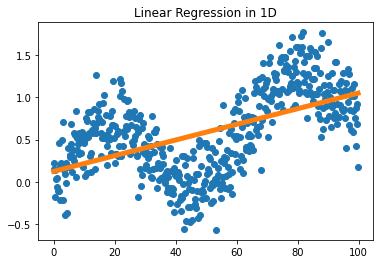

In [2]:
"""The simplest example for 1D linear regression"""
# Generate data (sine-like wave)
sample_size = 500
sample_x = numpy.arange(0, 100, 100/sample_size)
sample_y_true = numpy.sin(sample_x/10)/2 + sample_x*.01
sample_y = sample_y_true + numpy.random.randn(sample_size)/4

# Plot the data
fig0 = plt.figure(0)
ax0 = fig0.add_subplot(1, 1, 1)
ax0.plot(sample_x, sample_y, 'o')

# Implementation for the 1D linear regression
mat_1x = numpy.vstack((numpy.ones(sample_size), sample_x)).T
hat_beta = scipy.linalg.solve((mat_1x.T @ mat_1x),
                              (mat_1x.T @ sample_y))

# Compute the fit
hat_y = mat_1x @ hat_beta

# Plot the fit
ax0.plot(sample_x, hat_y, linewidth=5)
ax0.set_title('Linear Regression in 1D')
print('Y = {:5f} + {:5f}X'.format(*hat_beta))

From the above picture, the computed straight line looks either good or bad. 

1. Does the line explains the original data? Bad. We actually did wrong with picking the model, since we saw the curvy data but fit with the straight line. (High bias) 
2. How well does the line predict a new data? Good. (Low variance)

The straight line is simple, and simple is good, because

- it makes the computation easier,
- it makes the interpretation easier, and
- it works well with the scarce data.


#### Polynomial Regression

A reason why many textbooks primarily deal with the linear regression is that it allows us to fit in more complex way with the same method. The idea is simple. Assume we want to fit a quadratic curve instead of a straight line. Then we change the original linear model
$$\begin{equation} Y = \beta_0 + \beta_1 X \end{equation}$$
to the quadratic model by adding the quadratic term as
$$\begin{equation} Y = \beta_0 + \beta_1 X + \beta_2 X^2. \end{equation}$$
To get the estimate of $ \beta_0, \beta_1, \beta_2 $, the corresponding training data change in the same way
$$\begin{equation} \mathbf{X} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{bmatrix} \quad\Longrightarrow\quad \mathbf{X} = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_N & x_N^2 \end{bmatrix}, \end{equation}$$
and the final computation is done with the plain linear regression.

Y = 0.441384 + -0.009839X + 0.000191X^2
Y = 0.628106 + -0.032404X + 0.000757X^2 + -0.000004X^3


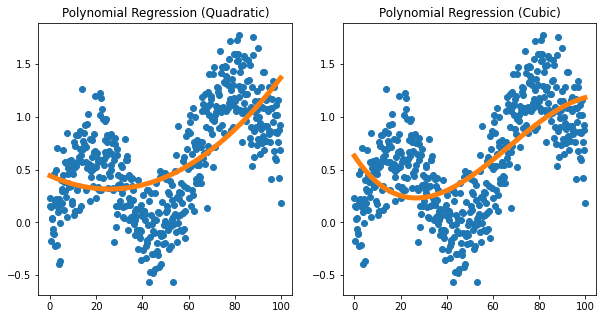

In [3]:
"""1D polynomial regression"""
# Plot the data
fig1 = plt.figure(1, figsize=(10, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax11.plot(sample_x, sample_y, 'o')
ax12 = fig1.add_subplot(1, 2, 2)
ax12.plot(sample_x, sample_y, 'o')

# Implementation for the 1D polynomial regression (quadratic/cubic)
mat_1x2 = numpy.vstack((numpy.ones(sample_size),
                        sample_x, sample_x*sample_x)).T
hat_beta2 = numpy.linalg.solve((mat_1x2.T @ mat_1x2),
                               (mat_1x2.T @ sample_y))
mat_1x3 = numpy.hstack((mat_1x2,
                        (sample_x*sample_x*sample_x).reshape(-1, 1)))
hat_beta3 = numpy.linalg.solve((mat_1x3.T @ mat_1x3),
                               (mat_1x3.T @ sample_y))

# Compute the fits
hat_y2 = mat_1x2 @ hat_beta2
hat_y3 = mat_1x3 @ hat_beta3

# Plot the fit
ax11.plot(sample_x, hat_y2, linewidth=5)
ax11.set_title('Polynomial Regression (Quadratic)')
ax12.plot(sample_x, hat_y3, linewidth=5)
ax12.set_title('Polynomial Regression (Cubic)')
print('Y = {:5f} + {:5f}X + {:5f}X^2'.format(*hat_beta2))
print('Y = {:5f} + {:5f}X + {:5f}X^2 + {:5f}X^3'.format(*hat_beta3))

### Neural Networks  (Moving Beyond Linearity)

- The central idea of neural networks is to extract linear combinations of the inputs as derived features, and then model the target as a nonlinear function of these features. The term "neural networks" is inspired by their initial development as models for the human brain, where each unit represents a neuron and connections represent synapses.

![Neural Network Introduction](images/intro_nn.png)


#### Single layer perceptron

The term _neural networks_ has evolved to encompass a large class of models and learning methods. Here we describe the most widely used "vanilla" neural net, sometimes called the **single hidden layer back-propagation network, or single layer perceptron**. See [Neural Network Architectures](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464)

There has been a great deal of _hype_ surrounding neural networks, making them seem magical and mysterious. As we make clear in this section, they are just nonlinear statistical models.

A neural network is a two-stage regression or classification model, typically represented by a _network diagram_ as in FIGURE 11.2. (from The Elements of Statistical Learning) This network applies both to regression or classification.

<img src='images/11.2.png' style='width: 60%'/>

- For regression, there is usually one output unit ($Y_1$) for $K=1$. These networks can seamlessly handle multiple quantitative responses.
- For $K$-class classification, there are $K$ output units, each modeling the probability of class $k$. The target measurements $Y_k$ are coded as 0-1 variables for each class.


### Mathematical Formulation

Derived features $Z_m$ are obtained from linear combinations of the inputs, and the target $Y_k$ is modeled as a function of these $Z_m$s:

$$
Z_m = \sigma(\alpha_{0m} + \alpha_m^T X), \quad m=1,\ldots,M,
$$

$$
T_k = \beta_{0k} + \beta_k^T Z, \quad k=1,\ldots,K,
$$

$$
f_k(X) = g_k(T), \quad k=1,\ldots,K.
$$

### Sigmoid

The activation function $\sigma(v)$ is usually chosen to be the _sigmoid_

\begin{equation}
\sigma(v) = \frac{1}{1+e^{-v}}.
\end{equation}

See FIGURE 11.3 for a plot of the sigmoid function.

<img src='images/11.3.png' style='width: 70%'/>


In [9]:
"""FIGURE 11.3. Plot of the sigmoid function.
The scale parameter s controls the activation rate,
and we can see that large s amounts to a hard activation at v=0.
Note that sigmoid(s(v-v0)) shifts the activation threshold from 0 to v0."""
import numpy
import matplotlib.pyplot as plt

In [10]:
def sigmoid(x:scipy.ndarray, s:float)->scipy.ndarray:
    return numpy.reciprocal(1+numpy.exp(-s*x))

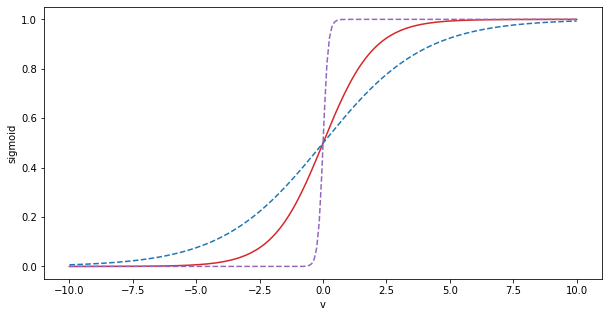

In [11]:
x = numpy.linspace(-10, 10, 200)
y_1 = sigmoid(x, 1)
y_half = sigmoid(x, .5)
y_10 = sigmoid(x, 10)

fig = plt.figure(0, figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y_1, color='C3')
ax.plot(x, y_half, '--', color='C0')
ax.plot(x, y_10, '--', color='C4')
ax.set_xlabel('v')
ax.set_ylabel('sigmoid')
plt.show()

By definition, activation function is a function used to transform the activation level of a unit (neuron) into an output signal. Typically, activation function has a “squashing” effect.  

Activation functions are usually introduced as requiring to be a non-linear function, that is, the role of activation function is made neural networks non-linear.  

<img src="images/neuralnetworkexample_ac.png"/>

Here I summarize several common-used activation functions, like Sigmoid, Tanh, ReLU, Softmax and so forth, as well as their merits and drawbacks.

<img src="images/activationfun.png" style='width: 75%'/>



### Bias unit (similar to the intercept/constant term in linear regression)

Neural network diagrams like FIGURE 11.2 are sometimes drawn with an additional _bias_ unit feeding into every unit in the hidden and output layers. Thinking of the constant "$1$" as an additional input feature, this bias unit captures the intercept $\alpha_{0m}$ and $\beta_{0k}$ in the above model.

### $g_k$

The output function $g_k(T)$ allows a final transformation of the vector of outputs $T$. For regression we typically choose the identity function $g_k(T) = T$.

Early work in $K$-class classification also used the identity function, but this was later abandoned in favor of the _softmax_ functon

\begin{equation}
g_k(T) = \frac{\exp T_k}{\sum_{l=1}^K \exp T_l}.
\end{equation}


### $Z$ again

The units in the middle of the network, computing the derived features $Z_m$, are called _hidden units_ because the values $Z_m$ are not directly observed.

We can think of the $Z_m$ as a basis expansion of the original inputs $X$; the neural network is then a standard linear model, or linear multilogit model, using these transformations and inputs.

There is, however, an important enhancement over the basis expansion techniques;

> here the parameters of the basis functions are learned from the data.

### Nonlinear generalization of the linear model

Notice that if $\sigma$ is the identity function, then the entire model collapses to a linear model in the inputs. Hence a neural network can be thought of as a nonlinear generalization of the linear model, both for regression and classification. By introducing the nonlinear transformation $\sigma$, it greatly enlarges the class of linear models.

In FIGURE we see that
* the rate of activation of the sigmoid depends on the norm of $\alpha_m$, and
* if $\|\alpha_m\|$ is very small, the unit will indeed be operating in the _linear part_ of its activation function.

### Fitting Neural Networks

The neural network model has unknown parameters, often called _weights_, and we seek values for them that make the model fit the training data well.

We denote the complete set of weights by $\theta$, which consists of

\begin{align}
\{ \alpha_{0m}, \alpha_m : m=1,2,\cdots,M \} & & M(p+1) \text{ weights}, \\
\{ \beta_{0k}, \beta_k : k=1,2,\cdots,K \} & & K(M+1) \text{ weights}.
\end{align}

For regression, we use sum-of-squared errors as our measure of fit (error function)

\begin{equation}
R(\theta) = \sum_{k=1}^K \sum_{i=1}^N (y_{ik} - f_k(x_i))^2.
\end{equation}

For classification we use either squared error or cross-entropy (deviance)

\begin{equation}
R(\theta) = -\sum_{i=1}^N \sum_{k=1}^K y_{ik}\log f_k(x_i),
\end{equation}

and the corresponding classifier is

\begin{equation}
G(x) = \arg\max_k f_k(x).
\end{equation}

With the softmax activation function and the cross-entropy error function, the neural network model is exactly a linear logistic regression in the hidden units, and all the parameters are estimated by maximum likelihood.

### Back-propagation = gradient descent

The generic approach to minimizing $R(\theta)$ is by gradient descent, called _back-propagation_ in this setting. Because of the compositional form of the model, the gradient can be easily derived using the chain rule for differentiation.

This can be computed by a forward and backward sweep over the network, keeping track only of quantities local to each unit.

### Back-propagation for squared error loss

Let
* $z_{mi} = \sigma(\alpha_{0m} + \alpha_m^T x_i)$, and
* $z_i = (z_{1i}, z_{2i}, \cdots, z_{Mi})$.

Then we have

\begin{align}
R(\theta) &\equiv \sum_{i=1}^N R_i \\
&= \sum_{i=1}^N \sum_{k=1}^K \left( y_{ik} - f_k(x_i) \right)^2,
\end{align}

with derivatives

\begin{align}
\frac{\partial R_i}{\partial\beta_{km}} &= -2\left( y_{ik} - f_k(x_i) \right) g_k'(\beta_k^T z_i) z_{mi}, \\
\frac{\partial R_i}{\partial\alpha_{ml}} &= -2\sum_{k=1}^K \left( y_{ik} - f_k(x_i) \right) g_k'(\beta_k^T z_i) \beta_{km} \sigma'(\alpha_m^T x_i) x_{il}.
\end{align}

Given these derivatives, a gradient descent update at the $(r+1)$st iteration has the form

\begin{align}
\beta_{km}^{(r+1)} &= \beta_{km}^{(r)} - \gamma_r \sum_{i=1}^N \frac{\partial R_i}{\partial\beta_{km}^{(r)}}, \\
\alpha_{ml}^{(r+1)} &= \alpha_{ml}^{(r)} - \gamma_r \sum_{i=1}^N \frac{\partial R_i}{\partial \alpha_{ml}^{(r)}},
\end{align}

where $\gamma_r$ is the learning rate, discussed below.

### Back-propagation equations

Now write the gradients as

\begin{align}
\frac{\partial R_i}{\partial\beta_{km}} &= \delta_{ki} z_{mi}, \\
\frac{\partial R_i}{\partial\alpha_{ml}} &= s_{mi} x_{il}.
\end{align}

The quantities $\delta_{ki}$ and $s_{mi}$ are "errors" from the current model at the output and hidden layer units, respectively. From their definitions, these errors satisfy

\begin{equation}
s_{mi} = \sigma'(\alpha_m^T x_i) \sum_{k=1}^K \beta_{km} \delta_{ki},
\end{equation}

known as the _back-propagation equations_. Using this, the gradient descent updates can be implemented with a two-pass algorithm.
1. In the _forward pass_, the current weights are fixed and the predicted values $\hat{f}_k(x_i)$ are computed from the formula  
  
  \begin{align}
  Z_m &= \sigma(\alpha_{0m} + \alpha_m^T X), & m=1,\cdots,M, \\
  T_k &= \beta_{0k} + \beta_k^T Z, & k=1,\cdots,K, \\
  f_k(X) &= g_k(T), & k=1,\cdots,K.
  \end{align}
  
2. In the _backward pass_, the errors $\delta_{ki}$ are computed, and then back-propagated via  

  \begin{equation}
  s_{mi} = \sigma'(\alpha_m^T x_i) \sum_{k=1}^K \beta_{km} \delta_{ki},
  \end{equation}
  
  to give the errors $s_{mi}$.

Both set of errors are then used to compute the gradients for the updates.

### Advantages of back-propagation

The advantages of back-propagation are its simple, local nature. In the back-propagation algorithm, each hidden unit passes and receives information only to and from units that share a connection. Hence it ca be implemented efficiently on a parallel architecture computer.

## Neural Network from Scratch in Python

We will implement a simple 3-layer neural network from scratch. Implementing a network from scratch at least once is an extremely valuable exercise. It helps you gain an understanding of how neural networks work, and that is essential to designing effective models.


<img src="images/nn.png" style='width: 40%'/>

<img src="images/bpro.png" style='width: 40%'/>




— — — — — — — — — — — — — 

A typical training script has the following steps:

- Define network
- Initialize parameters
- Loop over inputs
- Forward input through network to get output
- Compute loss with output and label
- Backprop gradient
- Update parameters with gradient descent.


In [24]:
import numpy as np

#Input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

#Output
y=np.array([[1],[1],[0]])

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=500 #Setting training iterations
lr=0.5 #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in data set
hiddenlayer_neurons = 10 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    #Forward Propogation
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)

    #Backpropagation
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr

print (output)



[[0.98022796]
 [0.95196219]
 [0.05560975]]


In [23]:
wh

array([[ 0.48107188, -0.21569528, -0.07359172,  1.3176662 ,  0.59527199,
         1.66761265, -0.41291756,  0.89298081,  0.04382271, -0.11753737],
       [ 0.68483888,  0.59733894,  0.93216195, -1.2400658 , -0.0297924 ,
        -1.50755506,  1.16830134,  0.26311348,  0.43116728,  1.39132479],
       [ 0.76956292, -0.29380486, -0.51594641,  1.02552222,  0.62630958,
         1.817957  ,  0.09710483,  0.1930829 ,  0.88378008, -0.19679114],
       [ 0.34953459,  1.03746872,  0.36964856, -0.38283014,  0.73931879,
        -0.54303229,  0.19882915,  0.47457544,  0.53326878,  0.15392127]])

## Neural Networks with Scikit-Learn

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [25]:
%matplotlib inline
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

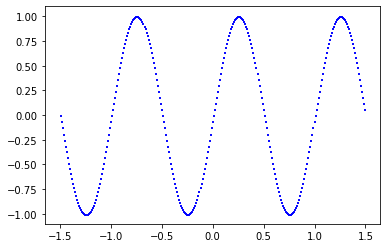

In [26]:
x = np.arange(-1.5, 1.5, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
plt.show()

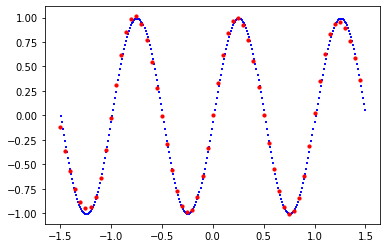

In [29]:
nn = MLPRegressor(
    hidden_layer_sizes=(4,),  activation='tanh', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.1, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

n = nn.fit(x, y)
test_x = np.arange(-1.5, 1.5, 0.05).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

### Another example!

In [8]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7.0, 5.0)

### Generating a dataset

Let's start by generating a dataset we can play with. Fortunately, [scikit-learn](http://scikit-learn.org/) has some useful dataset generators, so we don't need to write the code ourselves. We will go with the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.

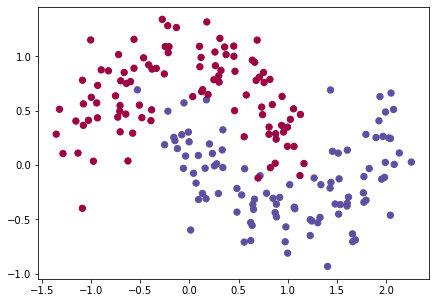

In [9]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

The dataset we generated has two classes, plotted as red and blue points. You can think of the blue dots as male patients and the red dots as female patients, with the x- and y- axis being medical measurements. 

Our goal is to train a Machine Learning classifier that predicts the correct class (male or female) given the x- and y- coordinates. Note that the data is not *linearly separable*, we can't draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In fact, that's one of the major advantages of Neural Networks. You don't need to worry about feature engineering. The hidden layer of a neural network will learn features for you.

### Logistic Regression

To demonstrate the point let's train a Logistic Regression classifier. It's input will be the x- and y-values and the output the predicted class (0 or 1). To make our life easy we use the Logistic Regression class from `scikit-learn`.

In [10]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [11]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

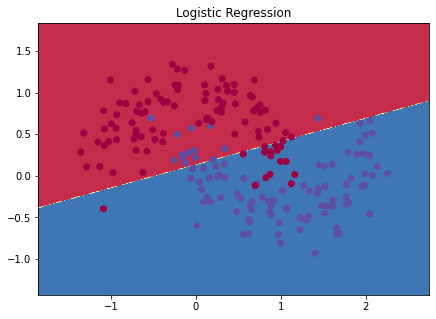

In [12]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

The graph shows the decision boundary learned by our Logistic Regression classifier. It separates the data as good as it can using a straight line, but it's unable to capture the "moon shape" of our data.

### Implementation

Now we are ready for our implementation. We start by defining some useful variables and parameters for gradient descent:

In [13]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

First let's implement the loss function we defined above. We use this to evaluate how well our model is doing:

In [14]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

We also implement a helper function to calculate the output of the network. It does forward propagation as defined above and returns the class with the highest probability.

In [15]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Finally, here comes the function to train our Neural Network. It implements batch gradient descent using the backpropagation derivates we found above.

In [16]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

### A network with a hidden layer of size 3

Let's see what happens if we train a network with a hidden layer size of 3.


Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068924
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

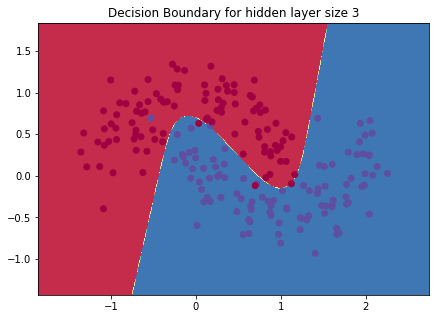

In [17]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Yay! This looks pretty good. Our neural networks was able to find a decision boundary that successfully separates the classes.

## Varying the hidden layer size

In the example above we picked a hidden layer size of 3. Let's now get a sense of how varying the hidden layer size affects the result.


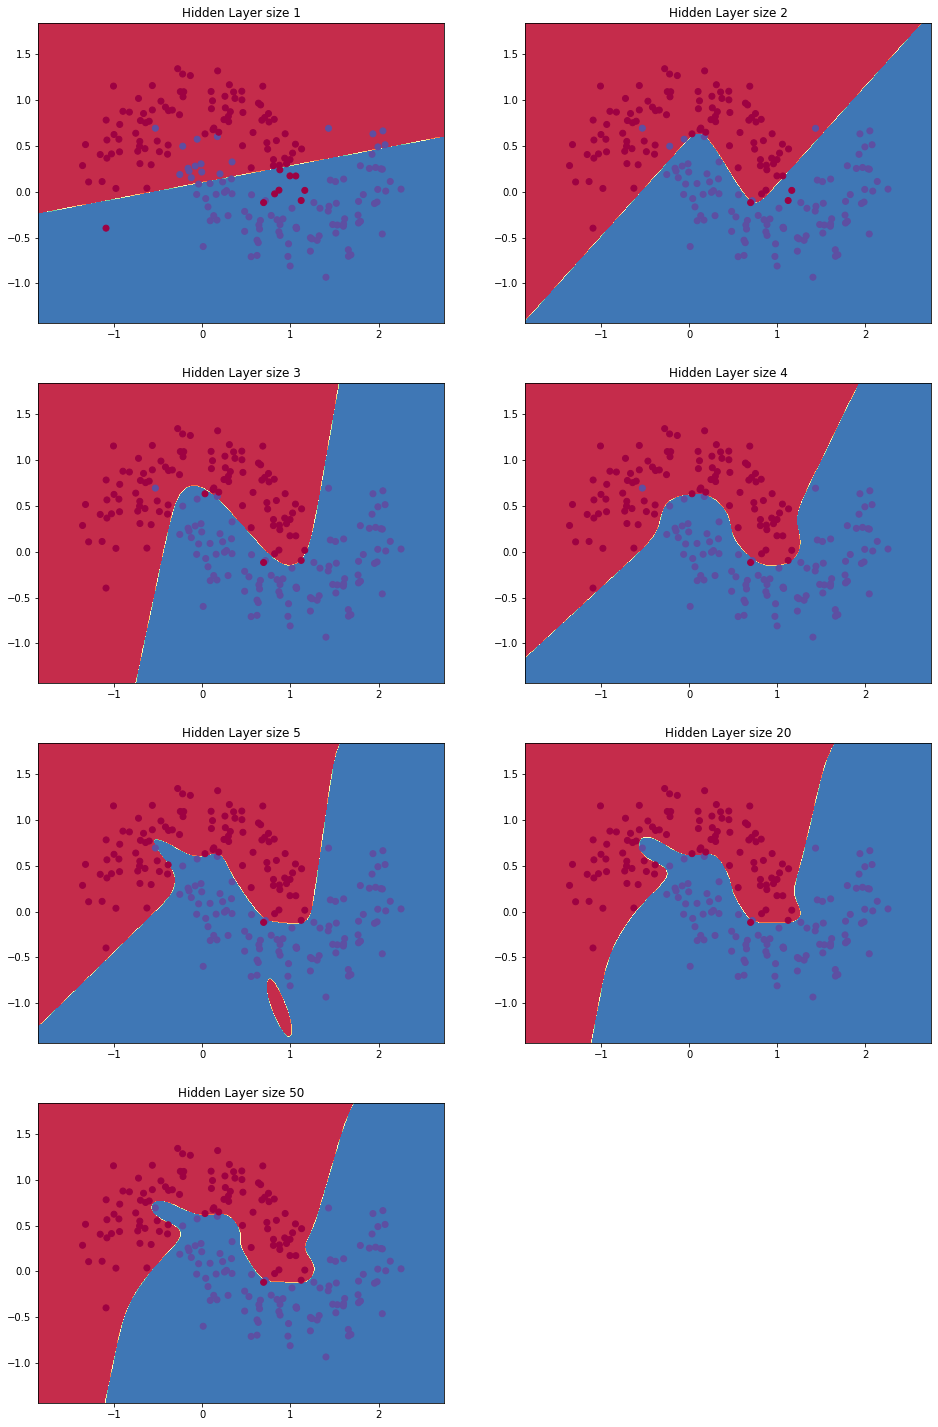

In [18]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

We can see that while a hidden layer of low dimensionality nicely capture the general trend of our data, but higher dimensionalities are prone to overfitting. They are "memorizing" the data as opposed to fitting the general shape. If we were to evaluate our model on a separate test set (and you should!) the model with a smaller hidden layer size would likely perform better because it generalizes better. We could counteract overfitting with stronger regularization, but picking the correct size for hidden layer is a much more "economical" solution.

### Example: Boston Housing Price

In this showcase, we are going to investigate the **Boston Housing Dataset** which consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE),  etc. Following is the list of data attributes in this dataset:

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000's
        
The dataset can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Housing) or alternatively be imported right away by scikit-learn.


If you fancy getting more hands-on experience with Regressions problems, I'll advise you to check out these two datasets on Kaggle:

* **[Lending Club Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data)**:  Publicly available loan applicant data from Lending Club with data such as applicant annual income, loan term, state of residence, credit score range and a number of other credit data, etc. The dataset is usually used in a classification scheme in predicting loan defaults, but it can also be used in a regression task of predicting an appropriate interest rates.

* **[NYC Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction)** Yellow Cab, Google, and Kaggle have teamed up together in creating this dataset with the goal of predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. 

These are both massive datasets and you are expected to face some challenges in solving them that may better prepare you for your own real-world tasks in the future. Make sure to check out the Kernels people uploaded for solving each of these datasets to get more insight. 


## Fetching data

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()

#import pandas as pd
#data_url = "http://lib.stat.cmu.edu/datasets/boston"
#boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

Let's see the description for the dataset:

In [25]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's change the data to a Panda's Dataframe

In [26]:
import pandas as pd
boston_df = pd.DataFrame(boston['data'] )
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now add the column names.


In [27]:
boston_df.columns = boston['feature_names']
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Inspecting data

 Let's check for missing values.

In [5]:
import numpy as np
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


Now, let's see the summary statistics of the dataset:

In [6]:
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Let's focus on the dependent variable, as the nature of the dependent variable is critical in our work. The dependent variable is median value of owner-occupied homes in $1000's (a continuous value).

It is relevant to look at the distribution of the dependent variable, so let's do that first.

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

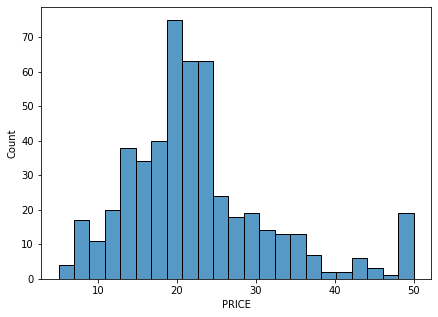

In [29]:
import seaborn as sns
sns.histplot(boston_df['PRICE'])

Here there is a normal distribution for the most part, with some at the top end of the distribution we could explore later.

Next, we can see how price is correlated with other variables by looking at the bottom row of the plot below:


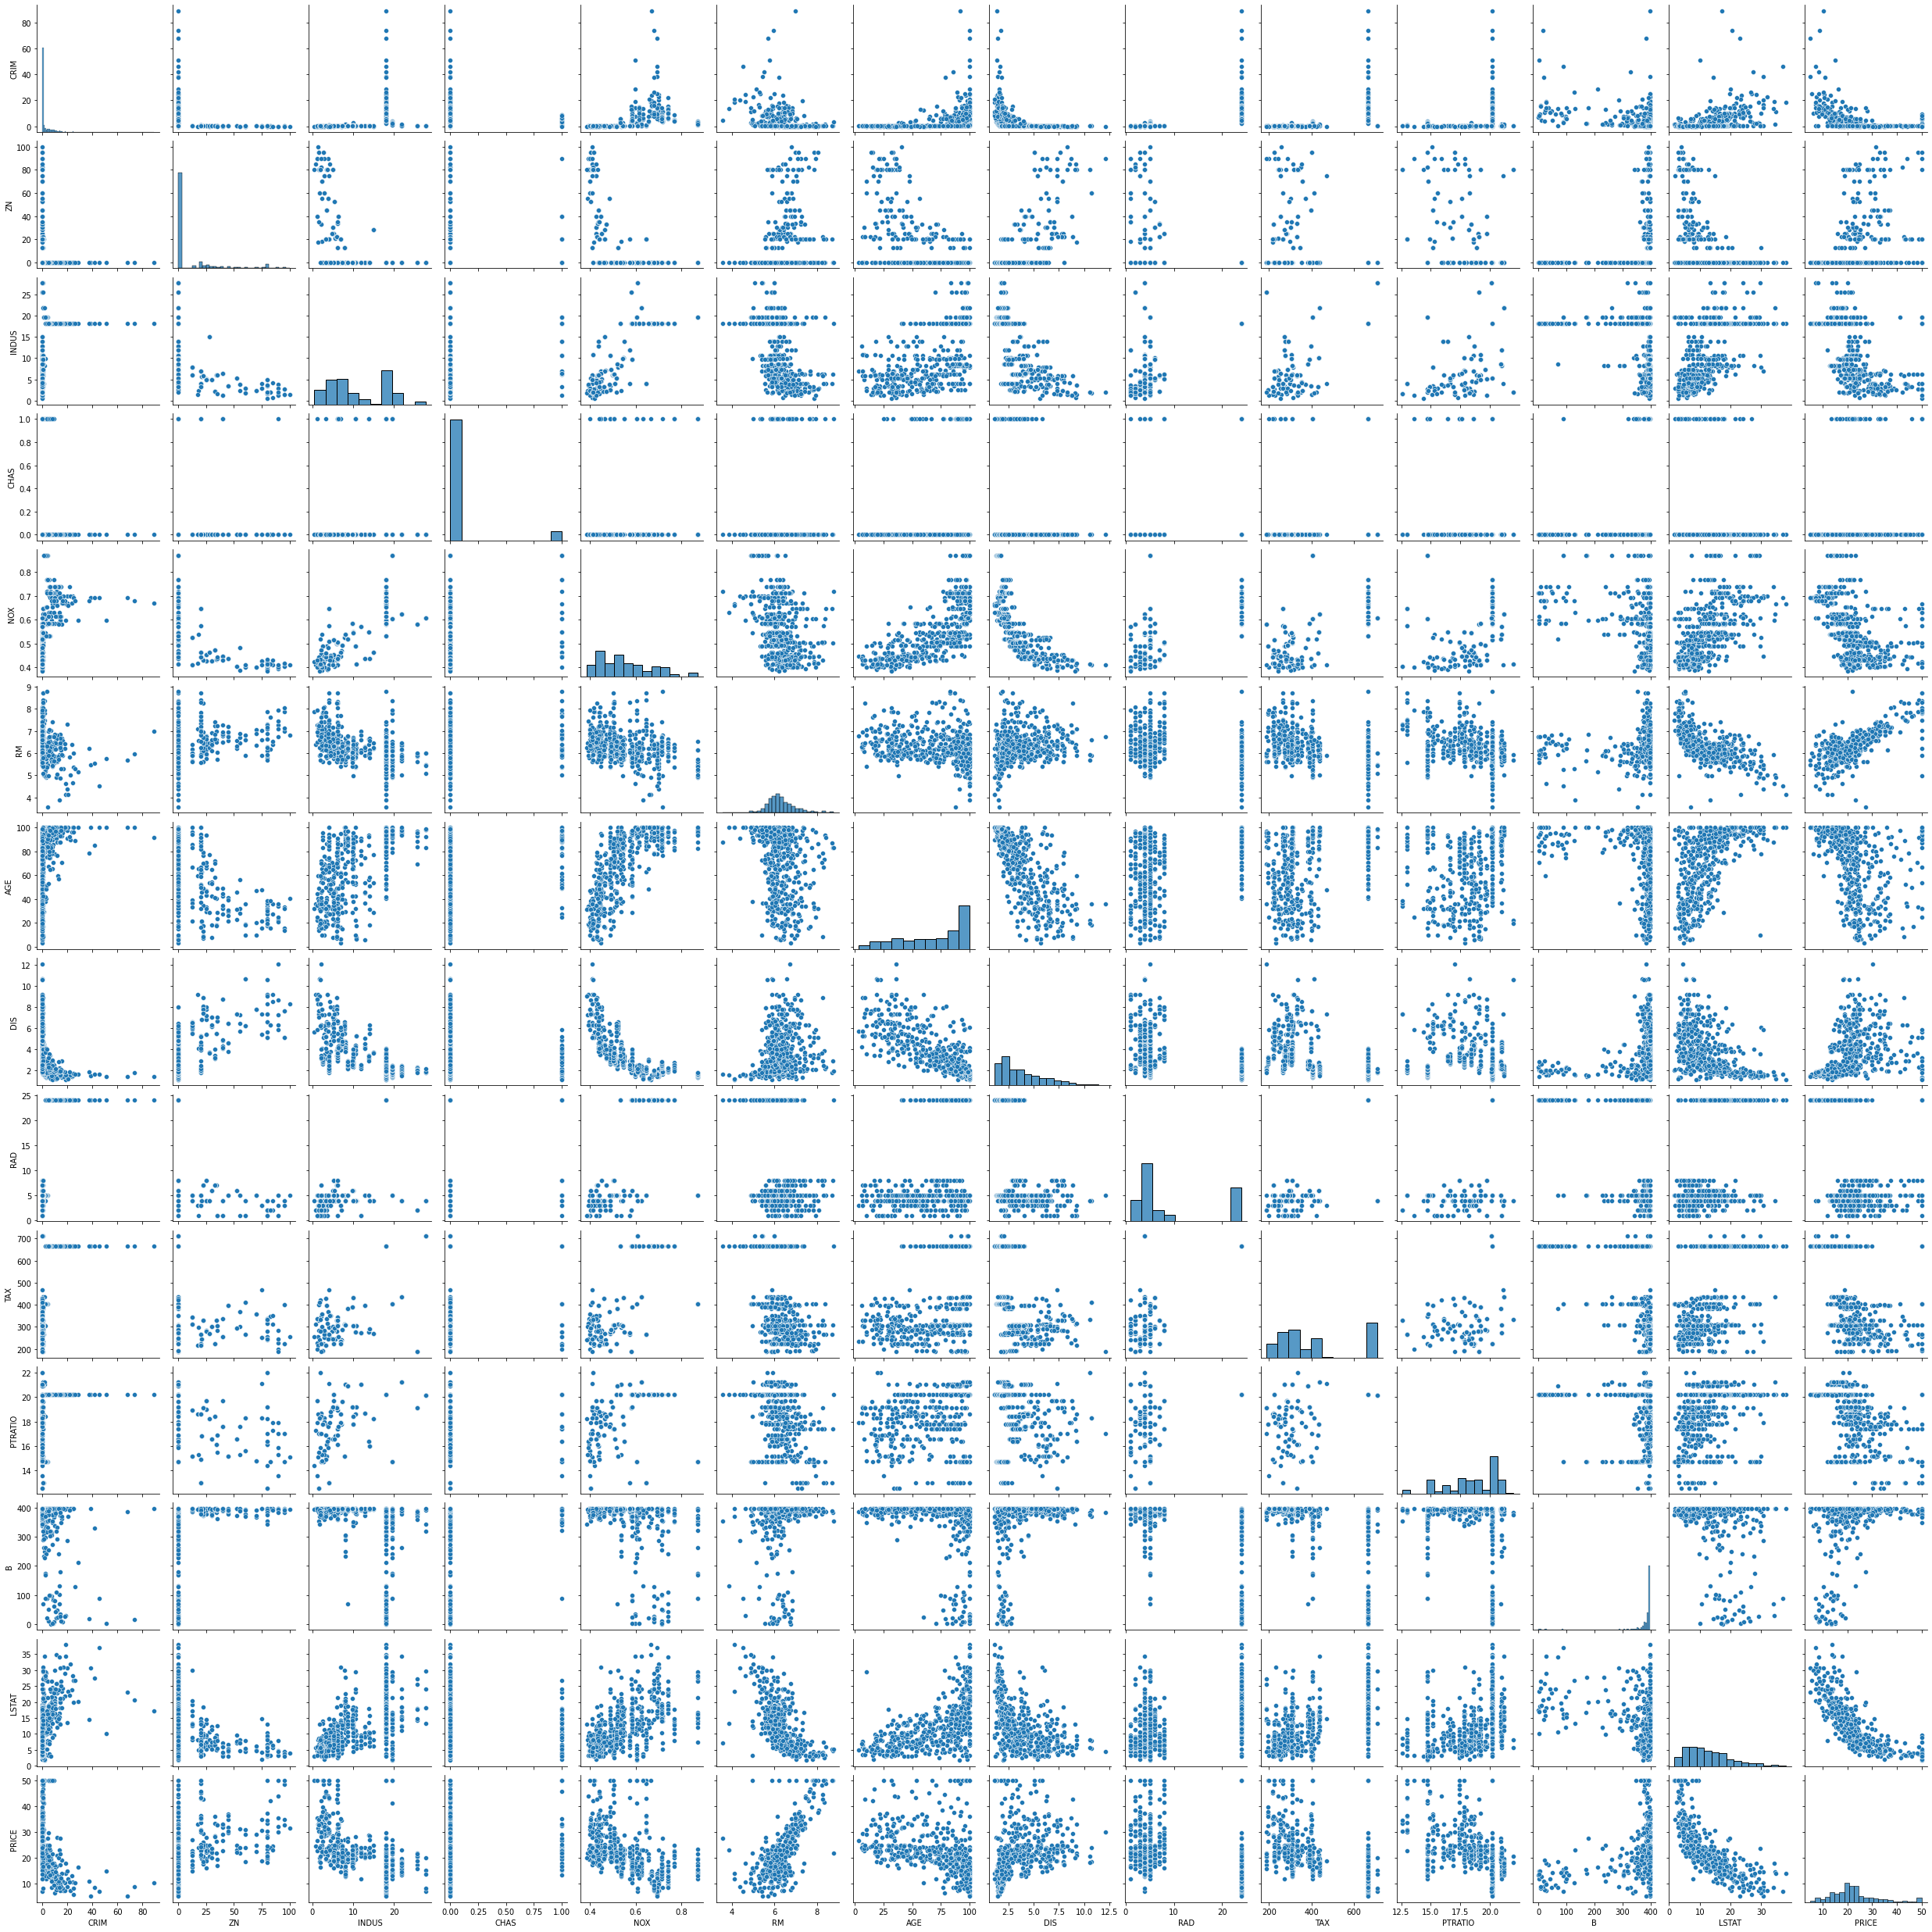

In [30]:
sns.pairplot(boston_df)

## Splitting into train and test set

In [9]:
#This will throw and error at import if haven't upgraded. 
# from sklearn.cross_validation  import train_test_split  
from sklearn.model_selection  import train_test_split

#y is the dependent variable.
y = boston_df['PRICE']
#iloc is used to slice the array by index number. X contains independent vars.
X = boston_df.iloc[:,0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354, 13) (152, 13) (354,) (152,)


## Defining hyperparameters

In [0]:
batch_size = 50
num_epochs = 200
learning_rate = 0.01
size_hidden= 100

batch_no = len(X_train) // batch_size  #batches
cols=X_train.shape[1] #Number of columns in input matrix
n_output=1


## Creating model

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Executing the model on :",device)

class Net(nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(cols, size_hidden, n_output)

Executing the model on : cpu


## Optimizer and loss function

In [0]:
#Adam is a specific flavor of gradient decent which is typically better
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
criterion = torch.nn.MSELoss(reduction='sum')  # this is for regression mean squared loss

## Training model

In [0]:
#Change to numpy arraay. 
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

In [16]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, y_train = shuffle(X_train, y_train)
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(y_train[start:end]))
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print("outputs",outputs)
        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0

Epoch 1 loss:  295235.486328125
Epoch 2 loss:  96469.70727539062
Epoch 3 loss:  56538.59716796875
Epoch 4 loss:  40096.530029296875
Epoch 5 loss:  32509.957763671875
Epoch 6 loss:  25112.3173828125
Epoch 7 loss:  21078.994995117188
Epoch 8 loss:  19871.923095703125
Epoch 9 loss:  20214.405883789062
Epoch 10 loss:  20352.581420898438
Epoch 11 loss:  19352.383666992188
Epoch 12 loss:  18343.990478515625
Epoch 13 loss:  19422.858642578125
Epoch 14 loss:  18670.769165039062
Epoch 15 loss:  17899.263671875
Epoch 16 loss:  17305.498046875
Epoch 17 loss:  17191.605102539062
Epoch 18 loss:  17554.259399414062
Epoch 19 loss:  16895.313720703125
Epoch 20 loss:  16202.666381835938
Epoch 21 loss:  15345.539428710938
Epoch 22 loss:  15342.872924804688
Epoch 23 loss:  14985.567565917969
Epoch 24 loss:  14875.521301269531
Epoch 25 loss:  14868.336059570312
Epoch 26 loss:  15868.339965820312
Epoch 27 loss:  15292.695068359375
Epoch 28 loss:  15666.527099609375
Epoch 29 loss:  14247.460083007812
Epoch 

## Calculate $R^2$ of NN model 

In [17]:

import pandas as pd
from sklearn.metrics import r2_score

X = Variable(torch.FloatTensor(X_train)) 
result = net(X)
pred=result.data[:,0].numpy()
print('R2 for Train', r2_score(pred,y_train))

X = Variable(torch.FloatTensor(X_test)) 
result = net(X)
pred=result.data[:,0].numpy()
print('R2 for Test', r2_score(pred, y_test))

R2 for Train 0.8282471419703058
R2 for Test 0.6302126933080165


Let's also plot actual prices against predicted prices:

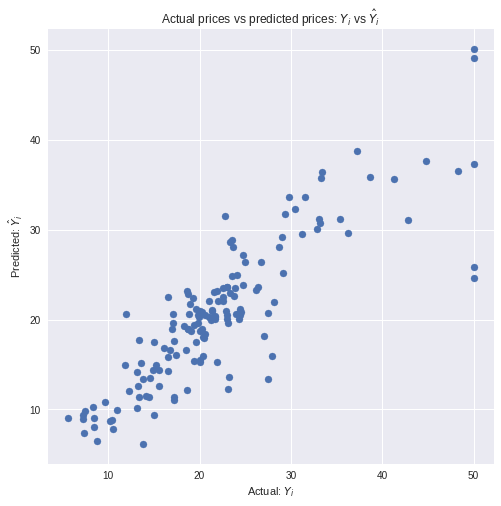

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.subplots(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
_ = plt.title("Actual prices vs predicted prices: $Y_i$ vs $\hat{Y}_i$")

## Calculate $R^2$ of linear regression model

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
#You can use .score() to calculate R^2
print('R2 for Train', lm.score(X_train, y_train))
print('R2 for Test', lm.score(X_test, y_test))

R2 for Train 0.7645451026942549
R2 for Test 0.6733825506400197


In [32]:
# Here in this code you will see how to use Grid Search to find the best number of nonlinear units in the hidden layer.

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')
 
boston = load_boston()
#df = pd.DataFrame(boston.data, columns = boston.feature_names)
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)
 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
 
tuned_parameters = [{'hidden_layer_sizes': [1,2,3,4,5,6,7,8,9,10,20,30,40],
'activation': ['relu'],
'solver':['lbfgs'], 'alpha':[0.0001],
'batch_size':['auto'], 'learning_rate':['constant'],
'learning_rate_init':[0.001], 'max_iter':[500]}]
rgr = GridSearchCV(MLPRegressor(), tuned_parameters, cv=5)
rgr.fit(X_train, y_train)
 
#mlp = MLPRegressor(hidden_layer_sizes=(20,), activation='logistic', solver='lbfgs', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=500)
#mlp.fit(X_train,y_train)
train_mse = mean_squared_error(y_train, rgr.predict(X_train))
test_mse = mean_squared_error(y_test, rgr.predict(X_test))
 
print(rgr.best_params_)
print(rgr.best_score_)
print("Train MSE:", np.round(train_mse,2))
print("Test MSE:", np.round(test_mse,2))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'}
0.8181174113597406
Train MSE: 10.58
Test MSE: 16.51


## Showcase 1 - Neural Nets for predicting the movement of the stock

In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler

In [33]:

# Download the data from Yahoo Finance
df = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

df = df.dropna()
df = df[['Open', 'High', 'Low', 'Close']]
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668
2018-01-03,21.400000,21.683332,21.036667,21.150000
2018-01-04,20.858000,21.236668,20.378668,20.974667
2018-01-05,21.108000,21.149332,20.799999,21.105333
2018-01-08,21.066668,22.468000,21.033333,22.427334


We then prepare the various input features which will be used by the artificial neural network learning for making the predictions. We define the following input features:

- High minus Low price
- Close minus Open price
- Three day moving average
- Ten day moving average
- 30 day moving average
- Standard deviation for a period of 5 days
- Relative Strength Index
- Williams %R

In [34]:
import pandas_ta as pta

# Predictor variables
df['O-C'] = df.Open - df.Close
df['H-L'] = df.High - df.Low
df['3day MA'] = df.Close.shift(1).rolling(window=3).mean()
df['10day MA'] = df.Close.shift(1).rolling(window=10).mean()
df['30day MA'] = df.Close.shift(1).rolling(window=30).mean()
df['Std_dev'] = df.Close.rolling(5).std()

# Using pandas-ta for RSI
df['RSI'] = pta.rsi(df.Close, length=9)

# Using pandas-ta for Williams %R
df['Williams %R'] = pta.willr(df.High, df.Low, df.Close, length=7)

df = df.dropna()
df.head()

,Open,High,Low,Close,O-C,H-L,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R
Date,,,,,,,,,,,,
2018-02-14,21.389334,21.744667,21.234667,21.487333,-0.098000,0.510000,21.106890,22.163000,22.400867,0.364370,42.108104,-48.848871
2018-02-15,21.633333,22.274668,21.493334,22.271334,-0.638000,0.781334,21.371112,21.949667,22.404822,0.595392,52.171565,-27.014469
2018-02-16,22.166668,22.874666,22.109333,22.365999,-0.199331,0.765333,21.778667,21.848467,22.442200,0.557207,53.274902,-24.378035
2018-02-20,22.298000,22.722668,22.100000,22.318001,-0.020000,0.622667,22.041555,21.793400,22.488578,0.433040,52.582984,-17.266302
2018-02-21,22.402000,22.646000,22.211332,22.219999,0.182001,0.434668,22.318445,21.804334,22.529000,0.364727,51.059742,-26.634148


We then define the output value as price rise, which is a binary variable storing 1 when the closing price of tomorrow is greater than the closing price of today.

In [35]:
df['Price_Rise'] = np.where(df.Close.shift(-1) > df.Close, 1, 0)
df = df.dropna()
df.head()

,Open,High,Low,Close,O-C,H-L,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
Date,,,,,,,,,,,,,
2018-02-14,21.389334,21.744667,21.234667,21.487333,-0.098000,0.510000,21.106890,22.163000,22.400867,0.364370,42.108104,-48.848871,1
2018-02-15,21.633333,22.274668,21.493334,22.271334,-0.638000,0.781334,21.371112,21.949667,22.404822,0.595392,52.171565,-27.014469,1
2018-02-16,22.166668,22.874666,22.109333,22.365999,-0.199331,0.765333,21.778667,21.848467,22.442200,0.557207,53.274902,-24.378035,0
2018-02-20,22.298000,22.722668,22.100000,22.318001,-0.020000,0.622667,22.041555,21.793400,22.488578,0.433040,52.582984,-17.266302,0
2018-02-21,22.402000,22.646000,22.211332,22.219999,0.182001,0.434668,22.318445,21.804334,22.529000,0.364727,51.059742,-26.634148,1


In [36]:
# input and output data
X = df.iloc[:, 4:-1]
y = df.iloc[:, -1]

split = int(len(df)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Building the Artificial Neural Network

import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [39]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

- Units: This defines the number of nodes or neurons in that particular layer. We have set this value to 128, meaning there will be 128 neurons in our hidden layer.
- Kernel_initializer: This defines the starting values for the weights of the different neurons in the hidden layer. We have defined this to be ‘uniform’, which means that the weights will be initialized with values from a uniform distribution.
- Activation: This is the activation function for the neurons in the particular hidden layer. Here we define the function as the rectified Linear Unit function or ‘relu’.
- Input_dim: This defines the number of inputs to the hidden layer, we have defined this value to be equal to the number of columns of our input feature dataframe. This argument will not be required in the subsequent layers, as the model will know how many outputs the previous layer produced.

In [40]:
# We add a second hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [41]:
# we built the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

The activation function is chosen to be the Sigmoid function because we would want the prediction to be a probability of market moving upwards.

In [42]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

- Optimizer: The optimizer is chosen to be ‘adam’, which is an extension of the stochastic gradient descent.
- Loss: This defines the loss to be optimized during the training period. We define this loss to be the mean squared error.
- Metrics: This defines the list of metrics to be evaluated by the model during the testing and training phase. We have chosen accuracy as our evaluation metric.

In [43]:
model = classifier.fit(X_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
197/197 [==============================] - 2s 5ms/step - loss: 0.6930 - accuracy: 0.5005
Epoch 2/10
197/197 [==============================] - 1s 5ms/step - loss: 0.6922 - accuracy: 0.5259
Epoch 3/10
197/197 [==============================] - 1s 5ms/step - loss: 0.6917 - accuracy: 0.5259
Epoch 4/10
197/197 [==============================] - 1s 5ms/step - loss: 0.6912 - accuracy: 0.5259
Epoch 5/10
197/197 [==============================] - 1s 6ms/step - loss: 0.6904 - accuracy: 0.5046
Epoch 6/10
197/197 [==============================] - 1s 6ms/step - loss: 0.6899 - accuracy: 0.5351
Epoch 7/10
197/197 [==============================] - 1s 6ms/step - loss: 0.6890 - accuracy: 0.5229
Epoch 8/10
197/197 [==============================] - 1s 5ms/step - loss: 0.6894 - accuracy: 0.5361
Epoch 9/10
197/197 [==============================] - 1s 6ms/step - loss: 0.6892 - accuracy: 0.5361
Epoch 10/10
197/197 [==============================] - 1s 6ms/step - loss: 0.6886 - accuracy: 0.5371

In [44]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

8/8 [==============================] - 0s 4ms/step


We then convert y_pred to store binary values by storing the condition y_pred > 5. Now, the variable y_pred stores either True or False depending on whether the predicted value was greater or less than 0.5.

In [45]:
df['y_pred'] = np.NaN
df.iloc[(len(df) - len(y_pred)):,-1:] = y_pred.astype(np.float64)
trade_df = df.dropna()

In [46]:
trade_df = df.dropna().copy()  # Explicitly create a copy
trade_df['Tomorrows Returns'] = 0.
trade_df['Tomorrows Returns'] = np.log(trade_df['Close']/trade_df['Close'].shift(1))
trade_df['Tomorrows Returns'] = trade_df['Tomorrows Returns'].shift(-1)
trade_df.head()

,Open,High,Low,Close,O-C,H-L,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred,Tomorrows Returns
Date,,,,,,,,,,,,,,,
2022-01-10,333.333344,353.033325,326.666656,352.706665,-19.373322,26.366669,353.308889,364.162332,347.871111,15.278400,49.394709,-65.736831,1,0.0,0.005917
2022-01-11,351.223328,358.616669,346.273346,354.799988,-3.576660,12.343323,349.975555,362.968332,347.606666,7.314940,50.383627,-62.982459,1,1.0,0.038538
2022-01-12,359.616669,371.613342,357.529999,368.739990,-9.123322,14.083344,349.942220,362.165997,346.800110,9.412873,56.719871,-44.640350,0,1.0,-0.069877
2022-01-13,369.690002,371.866669,342.179993,343.853333,25.836670,29.686676,358.748881,362.833664,346.371887,10.576693,45.141677,-72.911625,1,1.0,0.017346
2022-01-14,339.959991,350.666656,337.793335,349.869995,-9.910004,12.873322,355.797770,361.540997,345.666998,9.214006,48.027192,-48.665194,0,1.0,-0.018365


In [47]:
trade_df['Strategy Returns'] = 0.
trade_df['Strategy Returns'] = np.where(trade_df['y_pred'] == True, trade_df['Tomorrows Returns'], - trade_df['Tomorrows Returns'])
trade_df.head()

,Open,High,Low,Close,O-C,H-L,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred,Tomorrows Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,
2022-01-10,333.333344,353.033325,326.666656,352.706665,-19.373322,26.366669,353.308889,364.162332,347.871111,15.278400,49.394709,-65.736831,1,0.0,0.005917,-0.005917
2022-01-11,351.223328,358.616669,346.273346,354.799988,-3.576660,12.343323,349.975555,362.968332,347.606666,7.314940,50.383627,-62.982459,1,1.0,0.038538,0.038538
2022-01-12,359.616669,371.613342,357.529999,368.739990,-9.123322,14.083344,349.942220,362.165997,346.800110,9.412873,56.719871,-44.640350,0,1.0,-0.069877,-0.069877
2022-01-13,369.690002,371.866669,342.179993,343.853333,25.836670,29.686676,358.748881,362.833664,346.371887,10.576693,45.141677,-72.911625,1,1.0,0.017346,0.017346
2022-01-14,339.959991,350.666656,337.793335,349.869995,-9.910004,12.873322,355.797770,361.540997,345.666998,9.214006,48.027192,-48.665194,0,1.0,-0.018365,-0.018365


In [48]:
trade_df.loc[:, 'Cumulative Market Returns'] = np.cumsum(trade_df['Tomorrows Returns'])
trade_df.loc[:, 'Cumulative Strategy Returns'] = np.cumsum(trade_df['Strategy Returns'])
trade_df.head()

,Open,High,Low,Close,O-C,H-L,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred,Tomorrows Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
Date,,,,,,,,,,,,,,,,,,
2022-01-10,333.333344,353.033325,326.666656,352.706665,-19.373322,26.366669,353.308889,364.162332,347.871111,15.278400,49.394709,-65.736831,1,0.0,0.005917,-0.005917,0.005917,-0.005917
2022-01-11,351.223328,358.616669,346.273346,354.799988,-3.576660,12.343323,349.975555,362.968332,347.606666,7.314940,50.383627,-62.982459,1,1.0,0.038538,0.038538,0.044455,0.032620
2022-01-12,359.616669,371.613342,357.529999,368.739990,-9.123322,14.083344,349.942220,362.165997,346.800110,9.412873,56.719871,-44.640350,0,1.0,-0.069877,-0.069877,-0.025422,-0.037256
2022-01-13,369.690002,371.866669,342.179993,343.853333,25.836670,29.686676,358.748881,362.833664,346.371887,10.576693,45.141677,-72.911625,1,1.0,0.017346,0.017346,-0.008075,-0.019910
2022-01-14,339.959991,350.666656,337.793335,349.869995,-9.910004,12.873322,355.797770,361.540997,345.666998,9.214006,48.027192,-48.665194,0,1.0,-0.018365,-0.018365,-0.026440,-0.038275


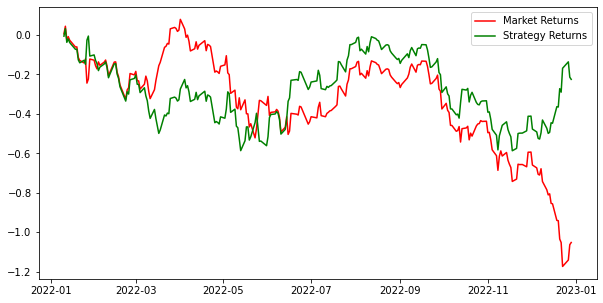

In [49]:
plt.figure(figsize=(10,5))
plt.plot(trade_df['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_df['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()